In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.layers import GaussianNoise

In [2]:

train_datagen = ImageDataGenerator( width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        rescale=1./255)

test_datagen = ImageDataGenerator(validation_split =0.5,  width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        rescale=1./255)

train_data = train_datagen.flow_from_directory(
       r'/content/drive/MyDrive/dataset/train',
        target_size=(256, 256),batch_size=248,
        class_mode='categorical')
valid_data = test_datagen.flow_from_directory(
       r'/content/drive/MyDrive/dataset/test',
        target_size=(256, 256),batch_size=128,subset ='training',
        class_mode='categorical')

test_data = test_datagen.flow_from_directory( r'/content/drive/MyDrive/dataset/test',
        target_size=(256, 256),subset='validation',
        batch_size=16,
        class_mode='categorical')



Found 10727 images belonging to 143 classes.
Found 1859 images belonging to 143 classes.
Found 1859 images belonging to 143 classes.


In [3]:
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.layers import GaussianNoise
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), kernel_regularizer=l2(0.0001), padding = 'Same', activation ='relu', input_shape = (256,256,3)))
model.add(tf.keras.layers.Conv2D(filters = 48, kernel_size = (3,3), kernel_regularizer=l2(0.0001), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = 2))
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),kernel_regularizer=l2(0.0001), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))
model.add(tf.keras.layers.Conv2D(filters = 192, kernel_size = (3,3), kernel_regularizer=l2(0.0001), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))
model.add(tf.keras.layers.Conv2D(filters = 192, kernel_size = (3,3), kernel_regularizer=l2(0.0001), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation = "relu", kernel_regularizer=l2(0.0001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(512, activation = "relu", kernel_regularizer=l2(0.0001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(256, activation = "relu", kernel_regularizer=l2(0.0001)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(143, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 8)       224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 48)      3504      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 48)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     55424     
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 128)     512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 192)       2

In [4]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger

csv_logger = CSVLogger("/content/drive/MyDrive/cnn-dataaugumentation/dataaugu_model2_history_log.csv", append=True)
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
es1 = EarlyStopping( monitor='val_accuracy', patience=5, min_delta=0.001, mode='max')
mc = ModelCheckpoint('/content/drive/MyDrive/cnn-dataaugumentation/dataaugu2_cnnmodel.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [5]:
import tensorflow.compat.v1 as tfs
gpu_options = tfs.GPUOptions(allow_growth = True)
session = tfs.InteractiveSession(config = tfs.ConfigProto(gpu_options = gpu_options))

In [6]:
adam =tf. keras.optimizers.Adam(learning_rate = 0.01, decay = 0.9)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [7]:
history = model.fit(train_data, validation_data=valid_data, epochs = 300, callbacks = [es1, mc,csv_logger], shuffle = True)

Epoch 1/300
44/44 [==============================] - 4700s 107s/step - loss: 6.6982 - accuracy: 0.0252 - val_loss: 11.2788 - val_accuracy: 0.0070

Epoch 00001: val_accuracy improved from -inf to 0.00699, saving model to /content/drive/MyDrive/cnn-dataaugumentation/dataaugu2_cnnmodel.h5
Epoch 2/300
44/44 [==============================] - 257s 6s/step - loss: 6.1776 - accuracy: 0.0627 - val_loss: 7.6151 - val_accuracy: 0.0097

Epoch 00002: val_accuracy improved from 0.00699 to 0.00968, saving model to /content/drive/MyDrive/cnn-dataaugumentation/dataaugu2_cnnmodel.h5
Epoch 3/300
44/44 [==============================] - 257s 6s/step - loss: 5.8633 - accuracy: 0.0903 - val_loss: 35.3695 - val_accuracy: 0.0081

Epoch 00003: val_accuracy did not improve from 0.00968
Epoch 4/300
44/44 [==============================] - 252s 6s/step - loss: 5.6423 - accuracy: 0.1210 - val_loss: 14.9371 - val_accuracy: 0.0075

Epoch 00004: val_accuracy did not improve from 0.00968
Epoch 5/300
44/44 [==========

In [24]:
history = model.fit(train_data, validation_data=valid_data, epochs = 300, callbacks = [es1, mc,csv_logger], shuffle = True)

Epoch 1/300
44/44 [==============================] - 2591s 58s/step - loss: 2.7641 - accuracy: 0.6613 - val_loss: 2.5751 - val_accuracy: 0.6826

Epoch 00001: val_accuracy improved from -inf to 0.68263, saving model to /content/drive/MyDrive/cnn-dataaugumentation/dataaugu2_cnnmodel.h5
Epoch 2/300
44/44 [==============================] - 255s 6s/step - loss: 2.3127 - accuracy: 0.7615 - val_loss: 2.2975 - val_accuracy: 0.7547

Epoch 00002: val_accuracy improved from 0.68263 to 0.75471, saving model to /content/drive/MyDrive/cnn-dataaugumentation/dataaugu2_cnnmodel.h5
Epoch 3/300
44/44 [==============================] - 255s 6s/step - loss: 2.1133 - accuracy: 0.8082 - val_loss: 2.0327 - val_accuracy: 0.8596

Epoch 00003: val_accuracy improved from 0.75471 to 0.85960, saving model to /content/drive/MyDrive/cnn-dataaugumentation/dataaugu2_cnnmodel.h5
Epoch 4/300
44/44 [==============================] - 253s 6s/step - loss: 1.9923 - accuracy: 0.8366 - val_loss: 2.0308 - val_accuracy: 0.8332



In [25]:
model.save_weights('/content/drive/MyDrive/cnn-dataaugumentation/cnn_augu_dataset-143_weights.h5')


In [29]:

test_datagen_nor = ImageDataGenerator(rescale=1./255)
test_datagen_aug = ImageDataGenerator( width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        rescale=1./255)

In [ ]:
## train and validation

In [26]:
train_acc=model.evaluate(train_data)
val_acc = model.evaluate(valid_data)
print("Train_Accuracy: %.2f%%" % (train_acc[1]*100))
print("valid_Accuracy: %.2f%%" % (val_acc[1]*100))

15/15 [==============================] - 37s 2s/step - loss: 1.3430 - accuracy: 0.9683
Train_Accuracy: 96.08%
valid_Accuracy: 96.83%


In [ ]:
## normal dataset

In [28]:
test_genrator_nor = test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/dataset/test',
        target_size=(256,256),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_nor)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 3718 images belonging to 143 classes.
117/117 [==============================] - 39s 337ms/step - loss: 2.9841 - accuracy: 0.4820
Test_Accuracy: 48.20%


In [ ]:
## normal dataset augumentation

In [30]:
test_genrator_nor = test_datagen_aug.flow_from_directory( r'/content/drive/MyDrive/dataset/test',
        target_size=(256,256),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_nor)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 3718 images belonging to 143 classes.
117/117 [==============================] - 76s 647ms/step - loss: 1.3327 - accuracy: 0.9629
Test_Accuracy: 96.29%


In [ ]:
## gaussian noise

In [32]:
test_genrator_gau_nor = test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/gaussiannoise/test',
        target_size=(256,256),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_gau_nor)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 3718 images belonging to 143 classes.
117/117 [==============================] - 163s 1s/step - loss: 3.1326 - accuracy: 0.4346
Test_Accuracy: 43.46%


In [ ]:
## gaussian noise augumentation

In [33]:
test_genrator_gau_augmen = test_datagen_aug.flow_from_directory( r'/content/drive/MyDrive/gaussiannoise/test',
        target_size=(256,256),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_gau_augmen)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 3718 images belonging to 143 classes.
117/117 [==============================] - 185s 2s/step - loss: 2.9357 - accuracy: 0.5385
Test_Accuracy: 53.85%


In [ ]:
## salt and pepper

In [39]:
test_genrator_salt = test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/saltandpeppernoise',
        target_size=(256,256),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_salt)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 3718 images belonging to 143 classes.
117/117 [==============================] - 792s 7s/step - loss: 8.1703 - accuracy: 0.0551
Test_Accuracy: 5.51%


In [ ]:
## corrupted-20%

In [38]:
test_corrupted2= test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/corrupted-2(50)',
        batch_size=32,target_size=(256,256),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted2)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 3718 images belonging to 143 classes.
117/117 [==============================] - 1039s 9s/step - loss: 8.9017 - accuracy: 0.0793
Test_Accuracy: 7.93%


In [ ]:
## corrupted-25%

In [ ]:
test_corrupted2= test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/corrupted-2(50)',
        batch_size=32,target_size=(256,256),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted2)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

In [ ]:
##corrupted-50%

In [ ]:
test_genrator_corrupted = test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/corrupted-1(50)',target_size=(256,256),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_corrupted)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1898 images belonging to 50 classes.
60/60 [==============================] - 687s 12s/step - loss: 13.2731 - accuracy: 0.0400
Test_Accuracy: 4.00%


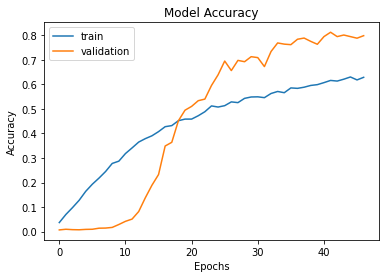

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.savefig('/content/drive/MyDrive/cnn-dataaugumentation/cnn-augu-143-accuracy.png')
plt.show()

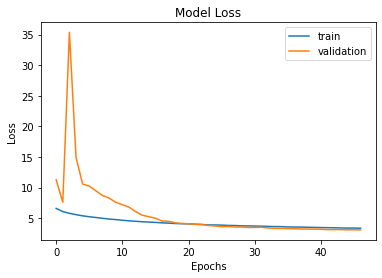

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.savefig('/content/drive/MyDrive/cnn-dataaugumentation/cnn-augu-143-loss.png')
plt.show()